### Resumo do Capítulo 4: A Transformada z

O Capítulo 4 aborda a **Transformada z**, uma extensão da Transformada de Fourier de Tempo Discreto (DTFT) que supera limitações como:

1. **Sinais não-somáveis** (e.g., $u(n)$, $nu(n)$)
2. **Respostas transitórias** com condições iniciais ou entradas variáveis

#### Conceitos-chave:

1. **Definição da Transformada z Bilateral**:

   $$
   X(z) = \sum_{n=-\infty}^{\infty} x(n)z^{-n}, \quad \text{Região de Convergência (ROC): } R_{x-} < |z| < R_{x+}
   $$

   - A ROC é um anel aberto no plano z, determinada pela magnitude $|z|$.

2. **Propriedades da ROC**:

   - Limitada por círculos
   - Não inclui polos
   - Para sequências causais: ROC externa a um círculo ($|z| > R_{x-}$)
   - Para sequências anticausais: ROC interna a um círculo ($|z| < R_{x+}$)

3. **Propriedades da Transformada z**:

   - Linearidade, deslocamento temporal, convolução, diferenciação no domínio z
   - Exemplo: Convolução $\mathcal{Z}[x_1(n) * x_2(n)] = X_1(z)X_2(z)$

4. **Inversão da Transformada z**:

   - Expansão em frações parciais para funções racionais
   - Técnicas para polos distintos e repetidos

5. **Representação de Sistemas**:

   - Função de sistema $H(z) = \frac{Y(z)}{X(z)}$
   - Relação com resposta em frequência: $H(e^{j\omega}) = H(z)\big|_{z=e^{j\omega}}$
   - **Estabilidade**: Círculo unitário ($|z|=1$) dentro da ROC
   - **Causalidade**: Todos os polos dentro do círculo unitário

6. **Solução de Equações de Diferenças**:

   - Uso da transformada z unilateral para resolver equações com condições iniciais
   - Decomposição da resposta: transitória/estacionária, entrada zero/estado zero


### Exemplos do Livro em Python
Alguns Exemplos do livro usando as bibliotecas Numpy, Scipy.Signal e Matplotlib

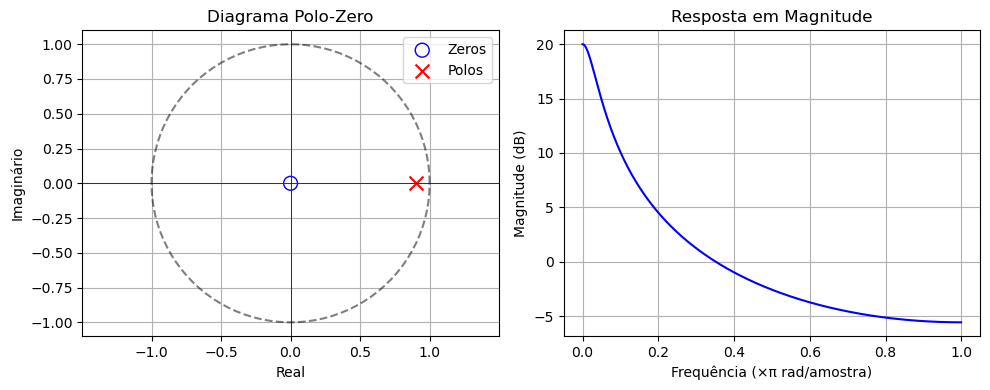

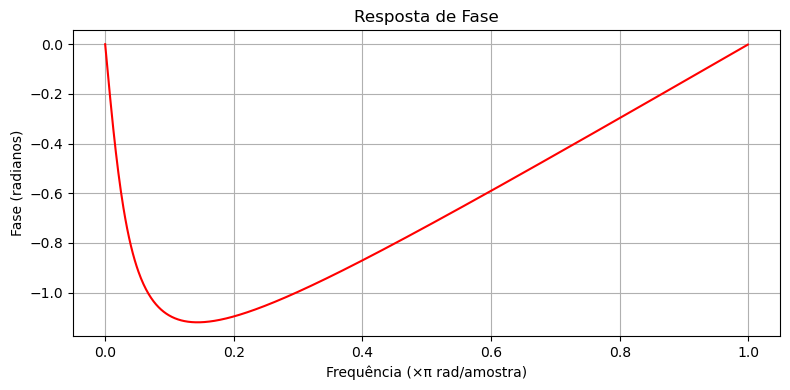

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Sistema: y(n) = 0.9y(n-1) + x(n)
b = [1, 0]  # Corrigido: [1, 0] representa numerador z (zero em z=0)
a = [1, -0.9]  # Denominador: z - 0.9

# (a) Diagrama polo-zero
plt.figure(figsize=(10, 4))
plt.subplot(121)
z, p, k = signal.tf2zpk(b, a)

# Plot polo e zero com círculo unitário
plt.scatter(np.real(z), np.imag(z), marker='o', s=100, facecolors='none', edgecolors='b', label='Zeros')
plt.scatter(np.real(p), np.imag(p), marker='x', s=100, color='r', label='Polos')
plt.plot(np.cos(np.linspace(0, 2*np.pi, 100)), 
         np.sin(np.linspace(0, 2*np.pi, 100)), 'k--', alpha=0.5)
plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.title('Diagrama Polo-Zero')
plt.xlabel('Real')
plt.ylabel('Imaginário')
plt.grid(True)
plt.legend()
plt.axis('equal')

# (b) Resposta em frequência
plt.subplot(122)
w, h = signal.freqz(b, a, worN=1024)
plt.plot(w/np.pi, 20 * np.log10(np.abs(h)), 'b')
plt.title('Resposta em Magnitude')
plt.xlabel('Frequência (×π rad/amostra)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot adicional: Resposta de fase
plt.figure(figsize=(8, 4))
plt.plot(w/np.pi, np.angle(h), 'r')
plt.title('Resposta de Fase')
plt.xlabel('Frequência (×π rad/amostra)')
plt.ylabel('Fase (radianos)')
plt.grid(True)
plt.tight_layout()
plt.show()

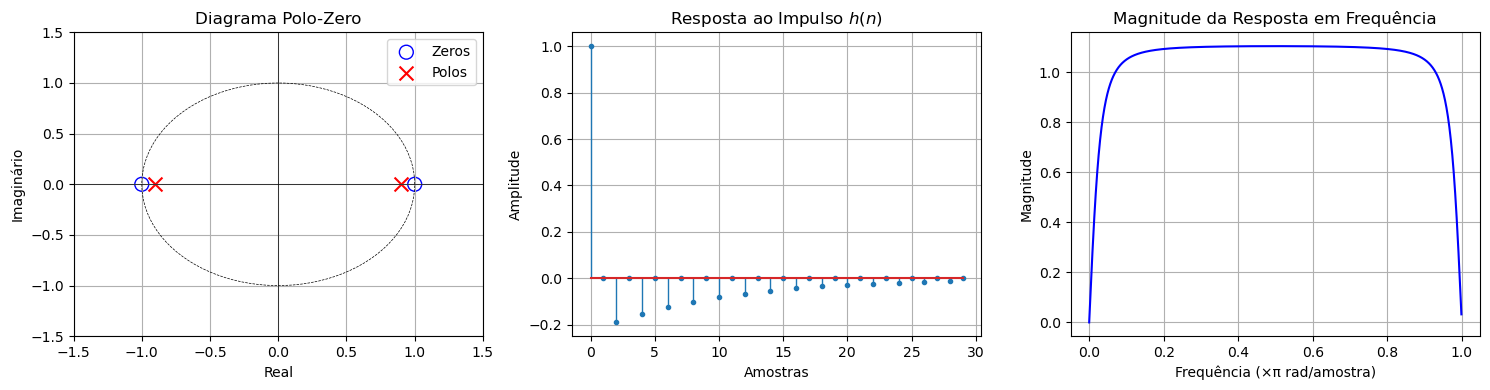

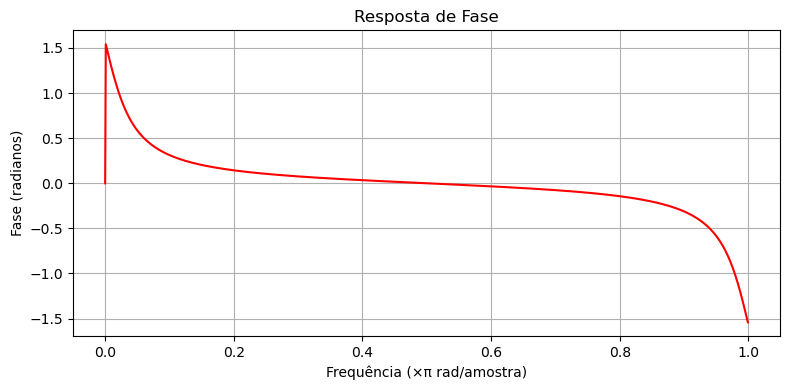

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Sistema: y(n) = 0.81y(n-2) + x(n) - x(n-2)
b = [1, 0, -1]  # Coeficientes de x(n)
a = [1, 0, -0.81]  # Coeficientes de y(n)

# Criar figura com subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# (a) Diagrama polo-zero
z, p, _ = signal.tf2zpk(b, a)
axs[0].scatter(np.real(z), np.imag(z), marker='o', s=100, facecolors='none', edgecolors='b', label='Zeros')
axs[0].scatter(np.real(p), np.imag(p), marker='x', s=100, color='r', label='Polos')
axs[0].axhline(0, color='k', linewidth=0.5)
axs[0].axvline(0, color='k', linewidth=0.5)
axs[0].set_title('Diagrama Polo-Zero')
axs[0].set_xlabel('Real')
axs[0].set_ylabel('Imaginário')
axs[0].legend()
axs[0].grid(True)
axs[0].set_xlim([-1.5, 1.5])
axs[0].set_ylim([-1.5, 1.5])

# Adicionar círculo unitário
theta = np.linspace(0, 2*np.pi, 100)
axs[0].plot(np.cos(theta), np.sin(theta), 'k--', linewidth=0.5)

# (b) Resposta ao impulso
n = np.arange(0, 30)
x_impulse = np.zeros_like(n)
x_impulse[0] = 1  # Delta na origem
h = signal.lfilter(b, a, x_impulse)  # Filtragem do impulso

# Plot da resposta ao impulso (SEM use_line_collection)
markerline, stemlines, baseline = axs[1].stem(n, h)
plt.setp(stemlines, 'linewidth', 1)
plt.setp(markerline, 'markersize', 3)
axs[1].set_title('Resposta ao Impulso $h(n)$')
axs[1].set_xlabel('Amostras')
axs[1].set_ylabel('Amplitude')
axs[1].grid(True)

# (c) Resposta em frequência
w, H = signal.freqz(b, a, worN=1024)
axs[2].plot(w/np.pi, np.abs(H), 'b')
axs[2].set_title('Magnitude da Resposta em Frequência')
axs[2].set_xlabel('Frequência (×π rad/amostra)')
axs[2].set_ylabel('Magnitude')
axs[2].grid(True)

plt.tight_layout()
plt.show()

# Plot adicional: Resposta de fase
plt.figure(figsize=(8, 4))
plt.plot(w/np.pi, np.unwrap(np.angle(H)), 'r')
plt.title('Resposta de Fase')
plt.xlabel('Frequência (×π rad/amostra)')
plt.ylabel('Fase (radianos)')
plt.grid(True)
plt.tight_layout()
plt.show()

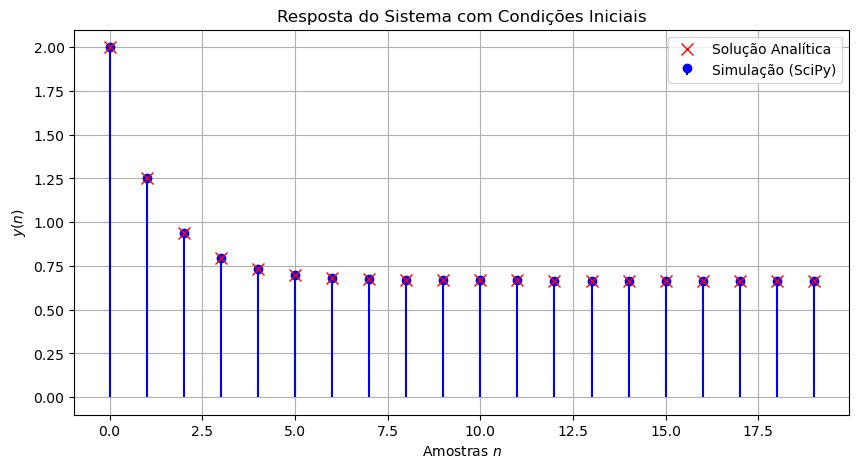

Diferença máxima entre simulação e solução analítica: 2.22e-16


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Sistema: y(n) - 1.5y(n-1) + 0.5y(n-2) = x(n)
# Coeficientes:
b = [1]      # Coeficientes de x(n) [b0]
a = [1, -1.5, 0.5]  # Coeficientes de y(n) [a0, a1, a2]

# Condições iniciais: y(-1)=4, y(-2)=10
y0 = [4, 10]  # [y(-1), y(-2)]

# Entrada x(n) = (1/4)^n u(n)
n = np.arange(0, 20)
x = (0.25)**n

# Cálculo do estado inicial usando lfiltic
zi = signal.lfiltic(b, a, y0)

# Simulação do sistema com condições iniciais
y, _ = signal.lfilter(b, a, x, zi=zi)

# Solução analítica (Exemplo 4.14)
y_analytical = (0.5)**n + 2/3 + (1/3)*(0.25)**n

# Plot
plt.figure(figsize=(10, 5))
plt.stem(n, y, linefmt='b-', markerfmt='bo', basefmt=' ', label='Simulação (SciPy)')
plt.plot(n, y_analytical, 'rx', markersize=8, linestyle='none', label='Solução Analítica')
plt.title('Resposta do Sistema com Condições Iniciais')
plt.xlabel('Amostras $n$')
plt.ylabel('$y(n)$')
plt.legend()
plt.grid(True)
plt.show()

# Verificação da diferença
diferença = np.max(np.abs(y - y_analytical))
print(f"Diferença máxima entre simulação e solução analítica: {diferença:.2e}")

#### Principais Resultados:
1. **Estabilidade**: Verificada pela localização dos polos (dentro do círculo unitário).
2. **Causalidade**: Respostas ao impulso começam em \( n \geq 0 \).
3. **Condições Iniciais**: Modificam a resposta transitória sem alterar a resposta estacionária.
4. **Frequência**: Magnitude varia conforme a localização dos polos/zeros.

Estas simulações demonstram os conceitos fundamentais da Transformada z aplicados à análise e projeto de sistemas digitais.

# Videos sobre o Capítulo 4: Transformada Z

## Univesp A transformada Z - Parte 1
[https://youtu.be/VKwG4fabOKM]

## Univesp A transformada Z - Parte 2
[https://youtu.be/hLRvMBF7qkw]

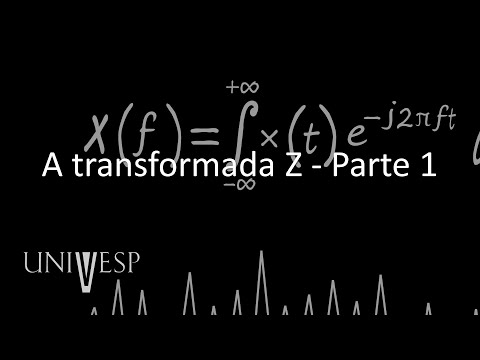

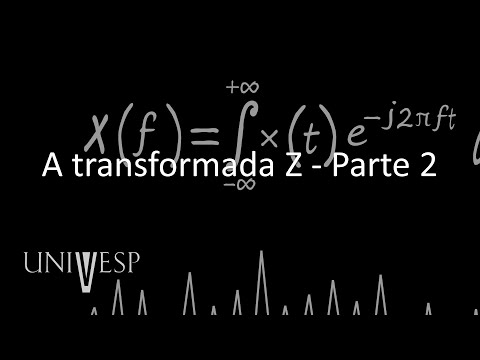

In [8]:
from IPython.display import YouTubeVideo, display

videos = [
    "VKwG4fabOKM",  # Univesp Transformada Z - Parte 1
    "hLRvMBF7qkw"   # Univesp Transformada Z - Parte 2
]

width = 1280
height = 720

for video_id in videos:
    display(YouTubeVideo(video_id, width=width, height=height))